# Notebook 'From Nijntje to Konijn'
Welcome to the Jupyter notebook for the paper 'From Nijntje to Konijn'. This notebook details the different functions that can be used for plotting with examples. 

Note 1: the code also contains plotting functions for plotting vocabulary development through time with the Tolerance principle [0]. These graphs were not included in the paper in the end because they were unusable due to the limitedness of the dataset, but the plotting functions are available for interested parties. 

Note 2: Some of the plots below give a lot of warnings of division by 0. This is not a problem in practice, since the 0 divided by 0 defaults to 0 in Python. 

Note 3: The different pkl files used in the publication are provided with the rest of the code. For applying this code to new datasets, first use readXMLfile.py (a script which can be used through the command line) to read in PhonBank xml files and transform them to pkl files. 

Note 4: By default, this notebook is set to be used on the CLPF corpus (the corpus created by Fikkert and Levelt). It should work with the other corpora as well, but some functions do not work that well because of the cross-sectional nature of those corpora. If a graph makes little sense, first check whether the corpus is cross-sectional or longitudinal. 

[0] Yang, Charles (2016), The Price of Linguistic Productivity: How Children Learn to Break the Rules of Language, The MIT Press, Cambridge, Massachusetts

In [1]:
import pandas as pd
import numpy as np
import csv
import unittest
import matplotlib.pyplot as plt
import math
from dateutil import parser
import re

In [2]:
# imports from functions
from plots import *
from ChildDevelopment import *
from settings import *
from syllable_investigation import *
from tables_Fikkert import *
from tolerance import *
from utils import *
from Word import *
from Wordlist import *

In [3]:
# Set the corpus name here
corpus_name = 'CLPF'

# Hypothesis graph
Following Fikkert's theory, the following graph details what we expect to happen in an ideal situation

- Stage 1: disyllables realized as monosyllabic
- Stage 2: both syllables realized, but stress on first syllable
- Stage 3: both syllables realized with equal stress
- Stage 4: adult like stress realization

[ 1.  5. 10. 11. 12.  6.  9.  7.  7.  9.  7.  7.  9.  9.  9.  9.]


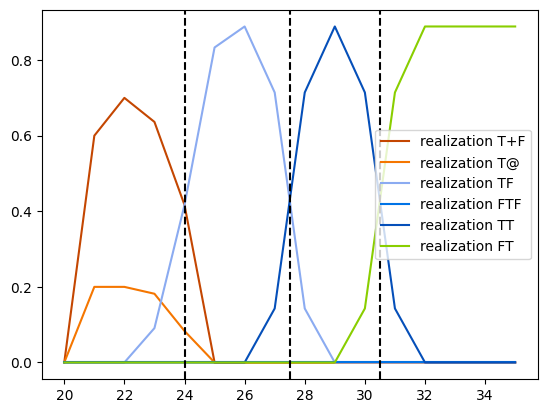

In [4]:
val_dict = {
    'T+F' : [0, 3, 7, 7, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'T@' : [0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    'TF' : [0, 0, 0, 1, 5, 5, 8, 5, 1, 0, 0, 0, 0, 0, 0, 0],
    'FTF' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'TT' : [0, 0, 0, 0, 0, 0, 0, 1, 5, 8, 5, 1, 0, 0, 0, 0],  
    'FT' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 8, 8, 8, 8]
}

val_dict_rel = {}
totals = np.ones(len(val_dict['T+F']))
for key in val_dict.keys():
    totals += val_dict[key]
print(totals)

for key in val_dict.keys():
    plt.plot(np.arange(20,36), val_dict[key]/totals, label="realization {}".format(key), c=analysis_dictionary['Fikkert']['color_dict_patterns']['r'+ key])
phase_boundaries = [24, 27.5, 30.5]
for b in phase_boundaries:
    plt.axvline(x=b, color='black', linestyle='--')
plt.legend()

# Analyze the data

This section contains different mains that use the functions above to extract (hopefully) useful data. As we perform many different types of analyses, there are quite some cells here.

We first transfrom the pikkled file to a neat csv with the necessary representation columns

In [5]:
pkl_to_csv(corpus_name)


Dropped 0 na items
Went from 138628 to 130452 with filtering, removing 8176
   Name               Age   word   model realization      rep_model  \
1  Leon  P1Y10M28DT0H0M0S    aap     ˈap        ˈʔap         [True]   
2  Leon  P1Y10M28DT0H0M0S  ander  ˈɑndəɹ       ˈʔɑnə  [True, False]   
3  Leon  P1Y10M28DT0H0M0S   auto    ˈoto      ʔɑˈtoː  [True, False]   
4  Leon  P1Y10M28DT0H0M0S    bal    ˈbɑl        ˈpɑl         [True]   
5  Leon  P1Y10M28DT0H0M0S   beer    ˈbeɹ        ˈpeʀ         [True]   

  rep_realization  
1          [True]  
2   [True, False]  
3   [False, True]  
4          [True]  
5          [True]  
       Name               Age   word   model realization      rep_model  \
1      Leon  P1Y10M28DT0H0M0S    aap     ˈap        ˈʔap         [True]   
2      Leon  P1Y10M28DT0H0M0S  ander  ˈɑndəɹ       ˈʔɑnə  [True, False]   
3      Leon  P1Y10M28DT0H0M0S   auto    ˈoto      ʔɑˈtoː  [True, False]   
4      Leon  P1Y10M28DT0H0M0S    bal    ˈbɑl        ˈpɑl         [True]   
5 

In [6]:
df = pd.read_csv(file_names_write[corpus_name], index_col=False, converters={'rep_model':eval, 'rep_realization':eval})

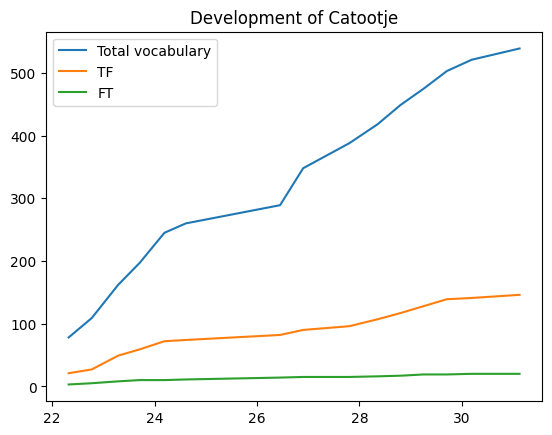

None


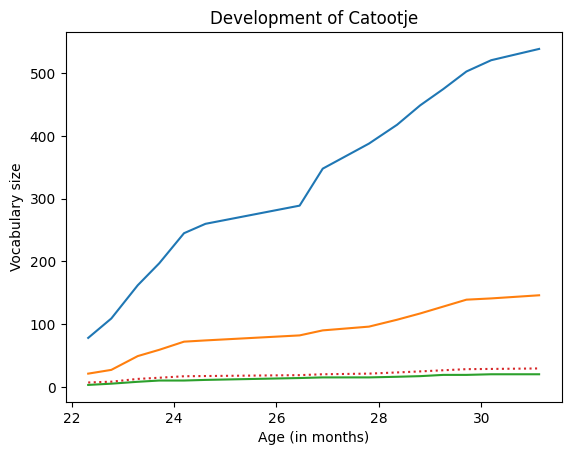

In [7]:
# Plot the vocabulary development of the first child as a test


child_test = build_wordlists_for_child(children_names_file[corpus_name][0], df)
child_test.build_complete_wordlists(df)

if corpus_name not in ['Bracci', 'FoxBoyer', 'Penney', 'Kuwaiti']:
    print(child_test.plot_vocab_dev(['TF', 'FT']))
    #print(child_test.complete_wordlists)
    #print(child_test.complete_wordlists[0])

    child_test.plot_vocab_dev_tolerance({'TF': ['FT']})

In [8]:
# Investigate what word types occur how often, where T indicates stress, and F indicates unstressed

word_type_investigation(df)


representation
TF        886
T         692
TFF       287
FT        104
FTF        95
TFFF       45
F          35
FFT        30
TFTF       18
FFTF       18
TTF        17
TT         14
FTFF        9
TFT         6
TFFFF       6
FFFT        5
FFTFF       4
TFFT        4
FTFTF       4
TFFTF       3
FF          2
FFFF        2
FFF         1
FFTFFF      1
FFFTTF      1
TTFF        1
FTFFFF      1
TFTFF       1
Name: count, dtype: int64


In [9]:
# Run reproduction of tables from Fikkert (see tables_Fikkert.py for more information)
print(df)
run_reproduce_tables(df, children_names_file[corpus_name], corpus_name, latex=False)


       Name               Age   word   model realization      rep_model  \
0      Leon  P1Y10M28DT0H0M0S    aap     ˈap        ˈʔap         [True]   
1      Leon  P1Y10M28DT0H0M0S  ander  ˈɑndəɹ       ˈʔɑnə  [True, False]   
2      Leon  P1Y10M28DT0H0M0S   auto    ˈoto      ʔɑˈtoː  [True, False]   
3      Leon  P1Y10M28DT0H0M0S    bal    ˈbɑl        ˈpɑl         [True]   
4      Leon  P1Y10M28DT0H0M0S   beer    ˈbeɹ        ˈpeʀ         [True]   
...     ...               ...    ...     ...         ...            ...   
18631  Elke   P1Y8M13DT0H0M0S    uit    ˈœyt         ˈœy         [True]   
18632  Elke   P1Y8M13DT0H0M0S    uit    ˈœyt         ˈɑu         [True]   
18633  Elke   P1Y8M13DT0H0M0S    vis    ˈvɪs        ˈpuf         [True]   
18634  Elke   P1Y8M13DT0H0M0S    vis    ˈvɪs       ˈpɪʃ̣         [True]   
18635  Elke   P1Y8M13DT0H0M0S    vis    ˈvɪs        ˈbɪə         [True]   

      rep_realization  
0              [True]  
1       [True, False]  
2       [False, True]  
3  

In [10]:
# Saves all heavy trochees to a csv for manual inspection
collect_heavy_trochees(df)

# Plot the stages

The following cell shows the different types of plots available for a child. The options are 'absolute', 'relative', 'relative_moving', 'moving_average', 'per_100', and 'per_100_moving'. In the following, we will mostly use relative_moving and absolute.

{'TF': (array([32., 21., 43., 38., 49., 11., 18., 26., 13., 17., 18., 20., 20.,
        8., 15.]), {'FT': array([0., 0., 1., 0., 0., 0., 0., 2., 0., 0., 0., 0., 1., 0., 0.])})}


/tmp/ipykernel_72585/3535562749.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


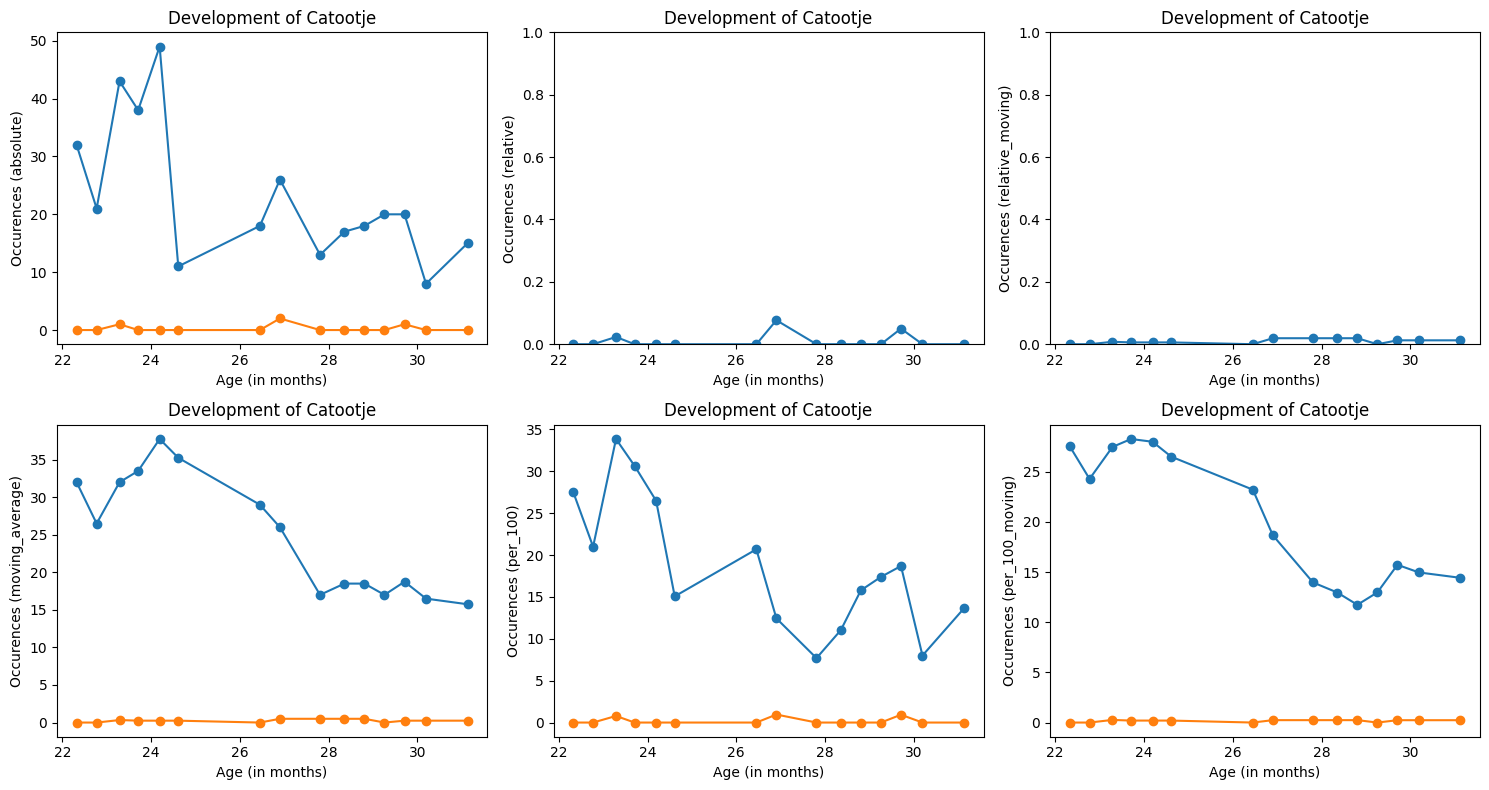

In [11]:
# Function to check if the development plots work for the first child
# The plots show the different plotting options available, and allow you to compare them and pick the one
# most suited to your purposes

counts = child_test.calculate_progress_of_patterns(analysis_dictionary['Fikkert']['patterns_heavy'])
print(counts)

types = ['absolute', 'relative', 'relative_moving', 'moving_average', 'per_100', 'per_100_moving']
fig, axs = plt.subplots(int(math.ceil(len(types)/3)), 3, figsize=(15,8))
axs = axs.ravel()

for i,t in enumerate(types):
    axs[i] = child_test.plot_count_patterns(counts, mode=t, ax=axs[i])

fig.tight_layout()
fig.show()

# Loop through children and create development
This part of the code:
- Loops through the children of the current corpus
- Creates the developments of these children
- Creates the necessary plots for these children

/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nien

/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nien

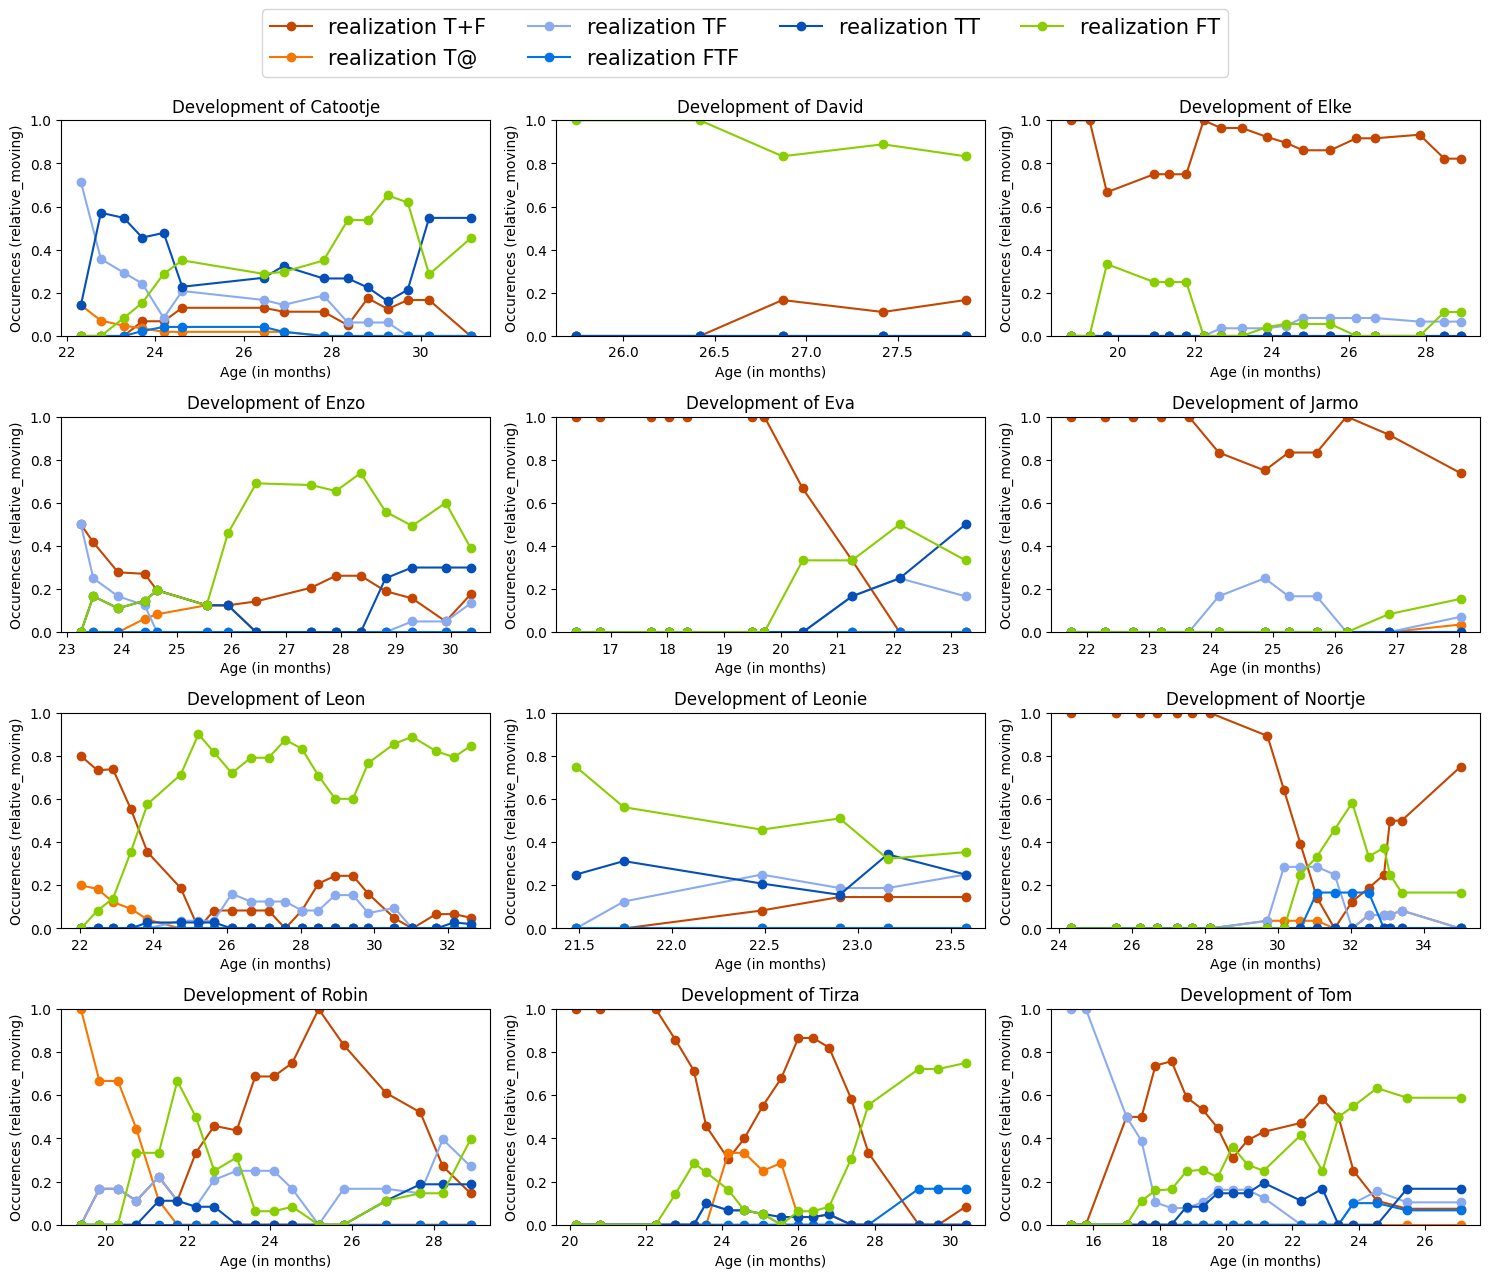

In [12]:
# Simplest plot, just shows the development per child with one mode

loop_through_children(df, children_names_file[corpus_name], analysis_dictionary['Fikkert'], 
                      nr_per_row=plot_settings[corpus_name]['nr_per_row'], 
                      colors=analysis_dictionary['Fikkert']['color_dict_patterns'], mode='relative_moving', 
                      window_size = plot_settings[corpus_name]['window_size'], 
                      padding_top=plot_settings[corpus_name]['padding_top']+0.11)


/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nien

/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nien

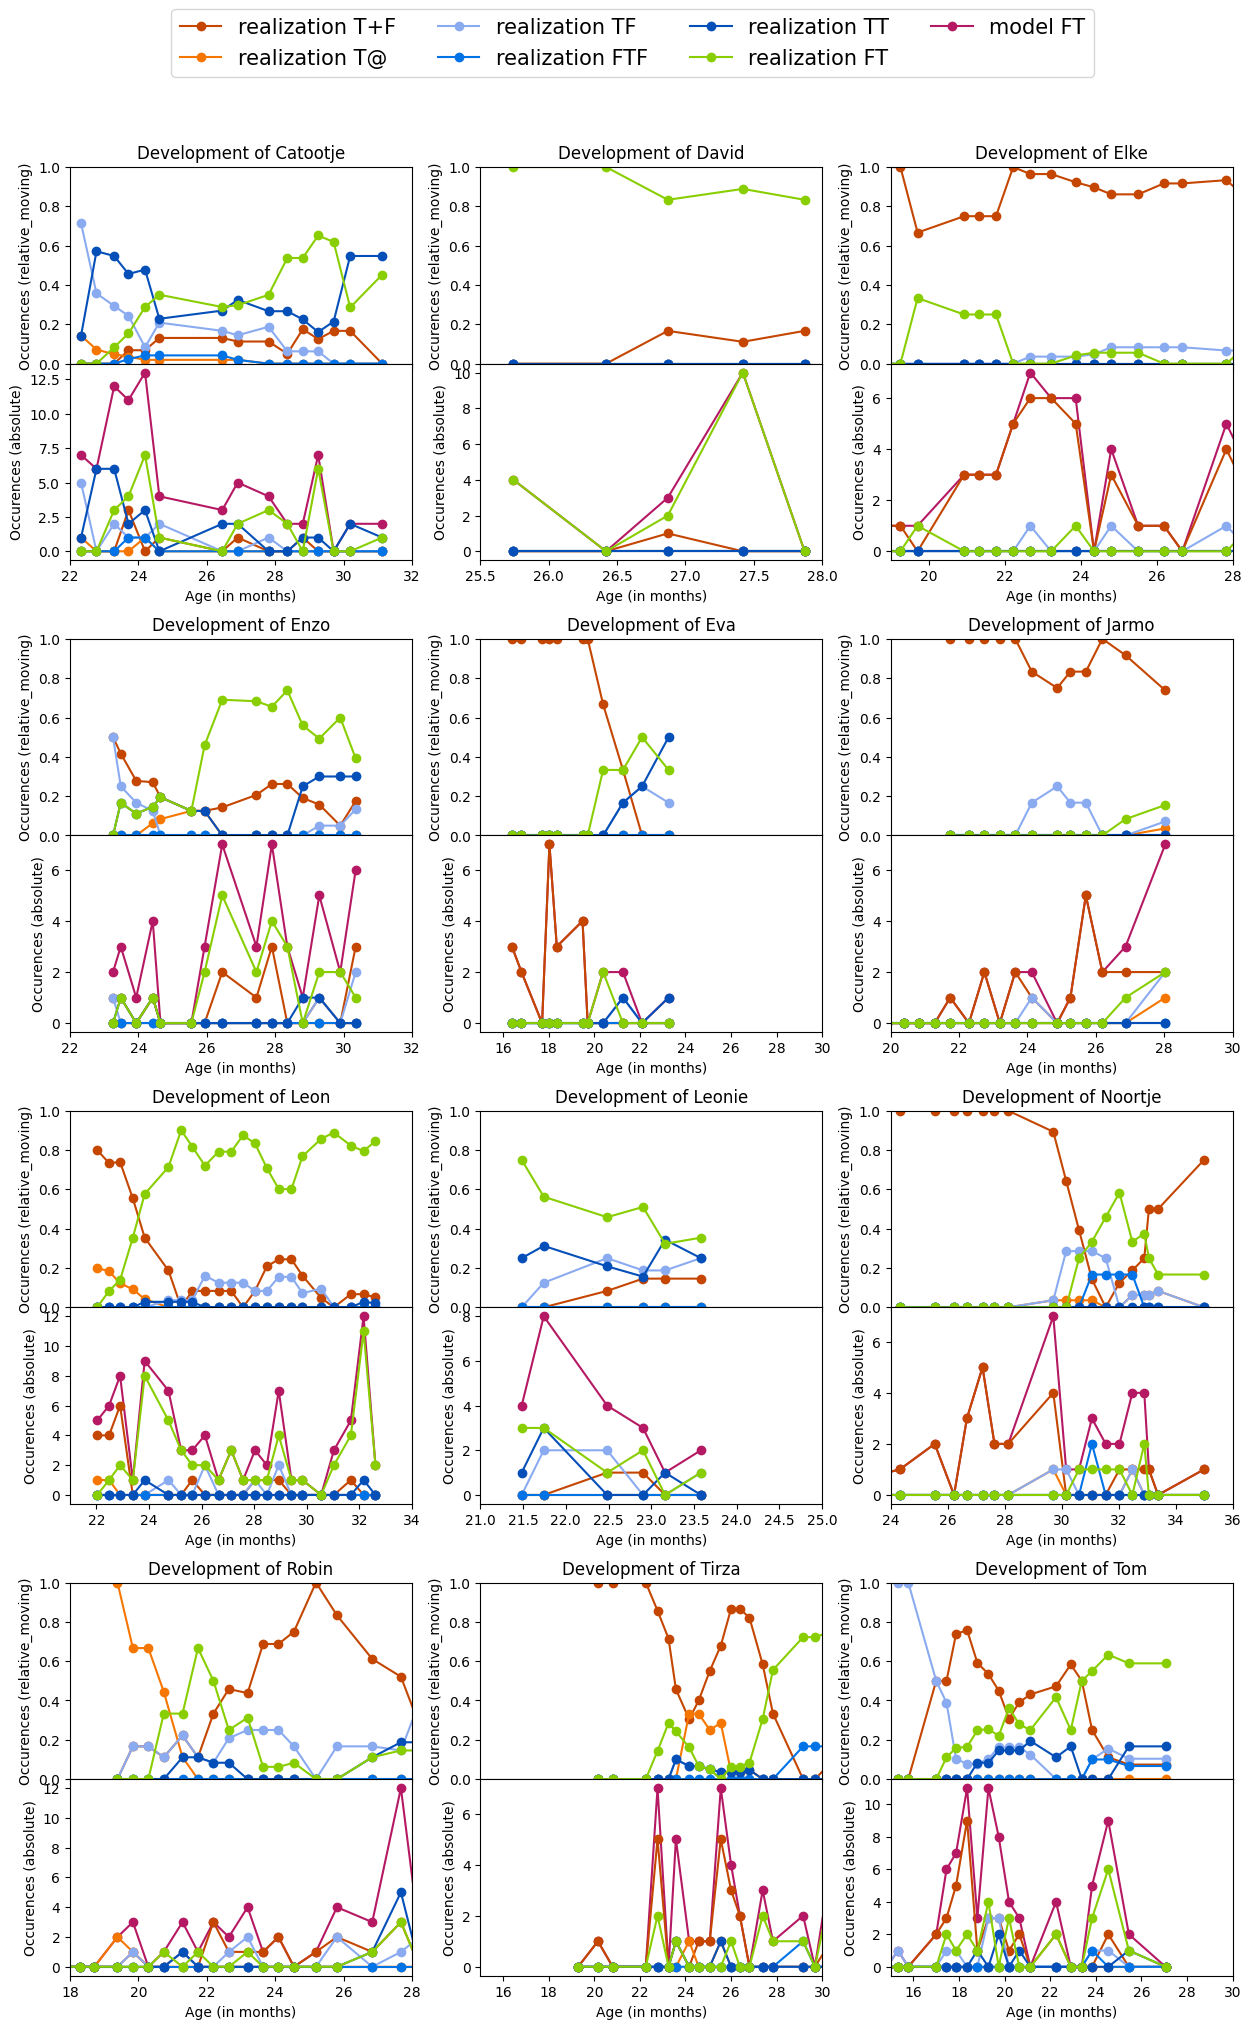

In [13]:
# Shows the development per child for two modes

loop_through_children_two_modes(df, children_names_file[corpus_name], analysis_dictionary['Fikkert'], 
                                nr_per_row=plot_settings[corpus_name]['nr_per_row'], 
                                xlim=xlim_per_child_dict[corpus_name], mode1='relative_moving', 
                                mode2='absolute', colors=analysis_dictionary['Fikkert']['color_dict_patterns'], 
                                window_size = plot_settings[corpus_name]['window_size'], 
                                padding_top=plot_settings[corpus_name]['padding_top'])


/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nien

/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nien

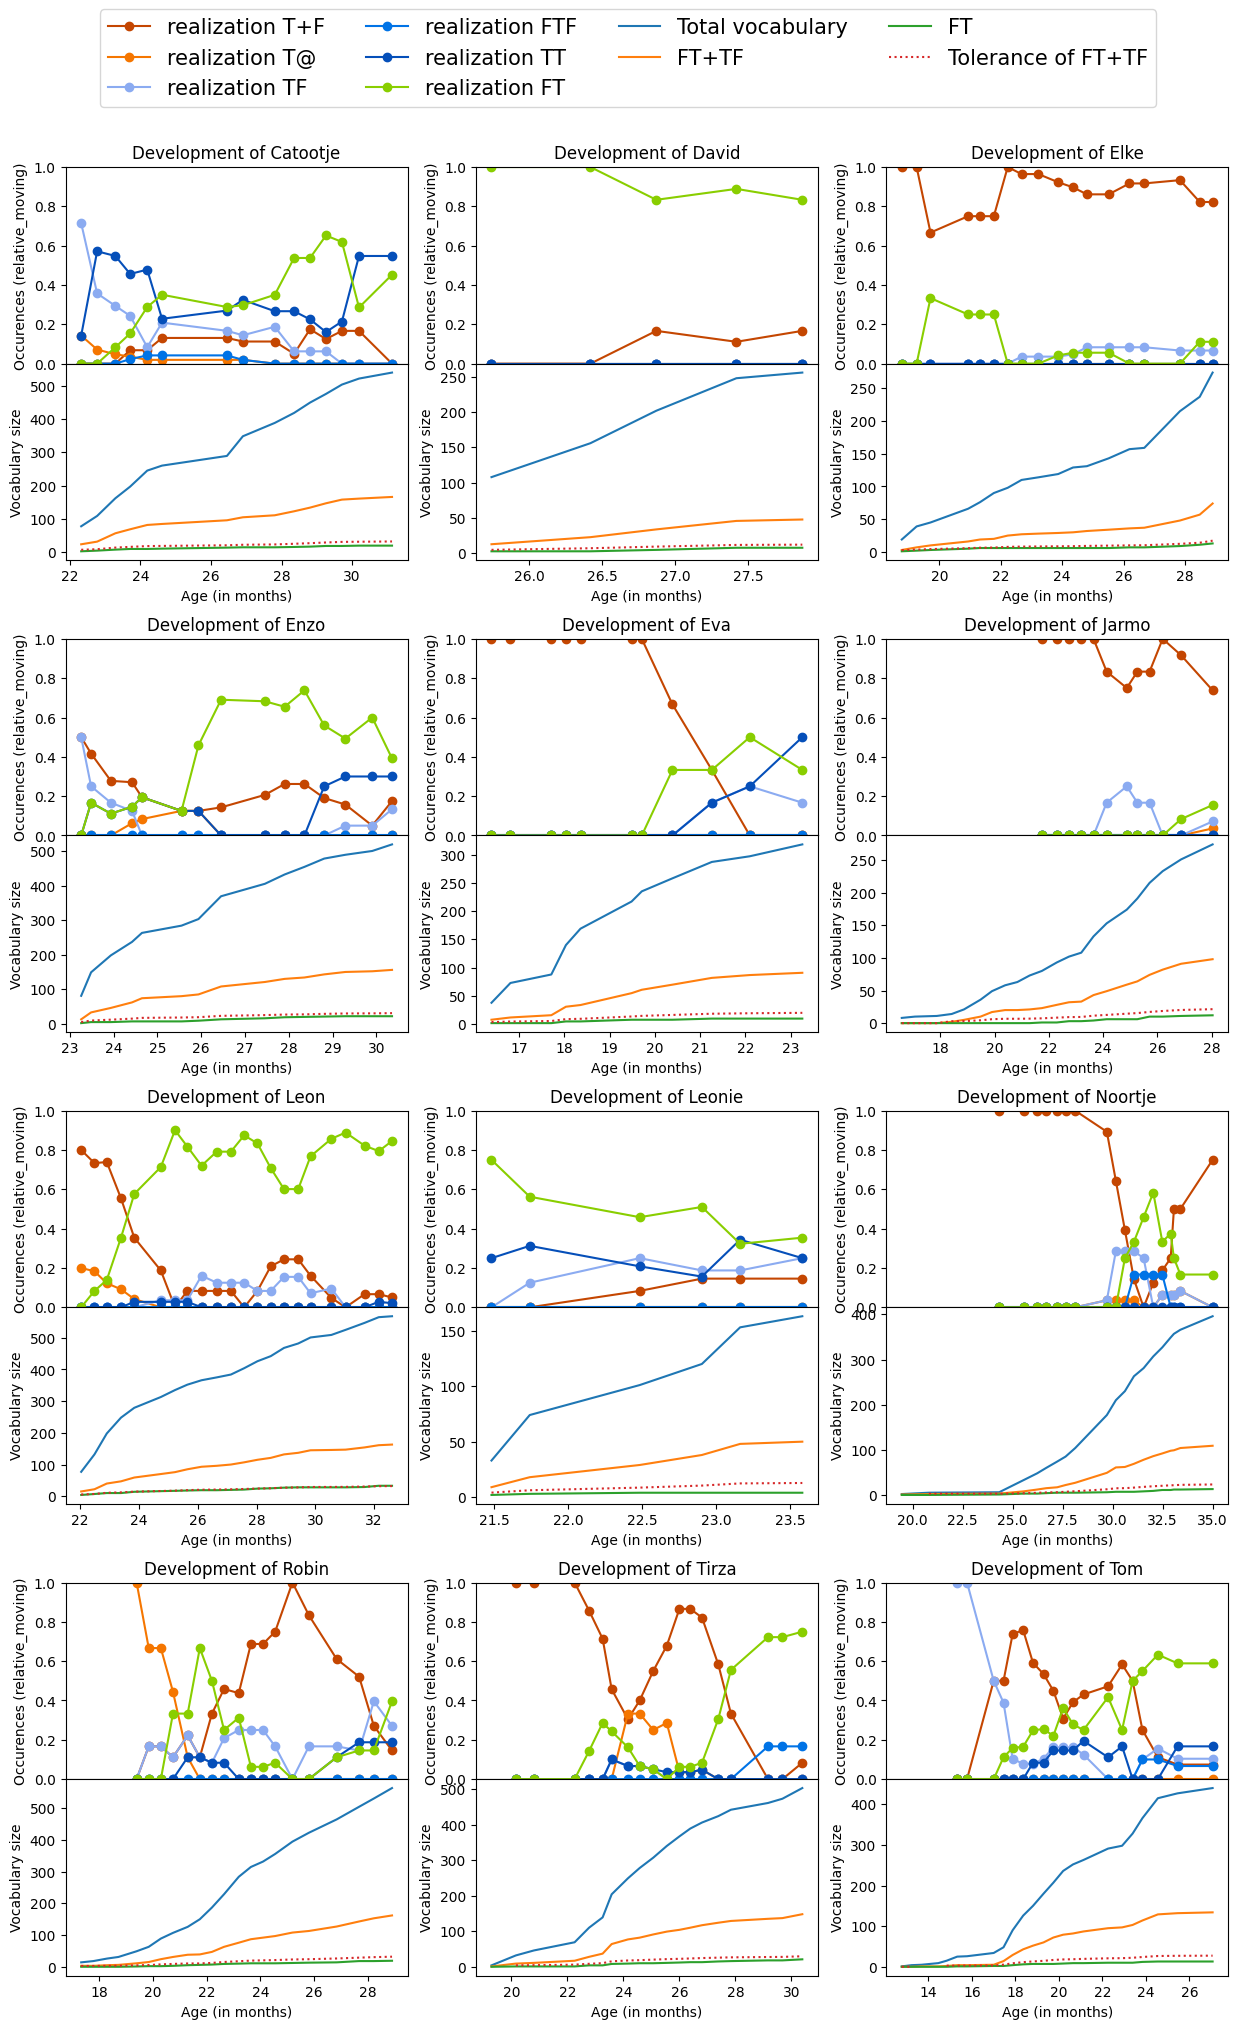

In [14]:
# Shows the development per child for the tolerance principle

loop_through_children_two_modes(df, children_names_file[corpus_name], analysis_dictionary['Fikkert'], 
                                nr_per_row=plot_settings[corpus_name]['nr_per_row'], mode1='relative_moving', 
                                mode2='tolerance', colors=analysis_dictionary['Fikkert']['color_dict_patterns'], 
                                window_size = plot_settings[corpus_name]['window_size'], 
                                padding_top=plot_settings[corpus_name]['padding_top'])


## Word level development

/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/plots.py:121: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


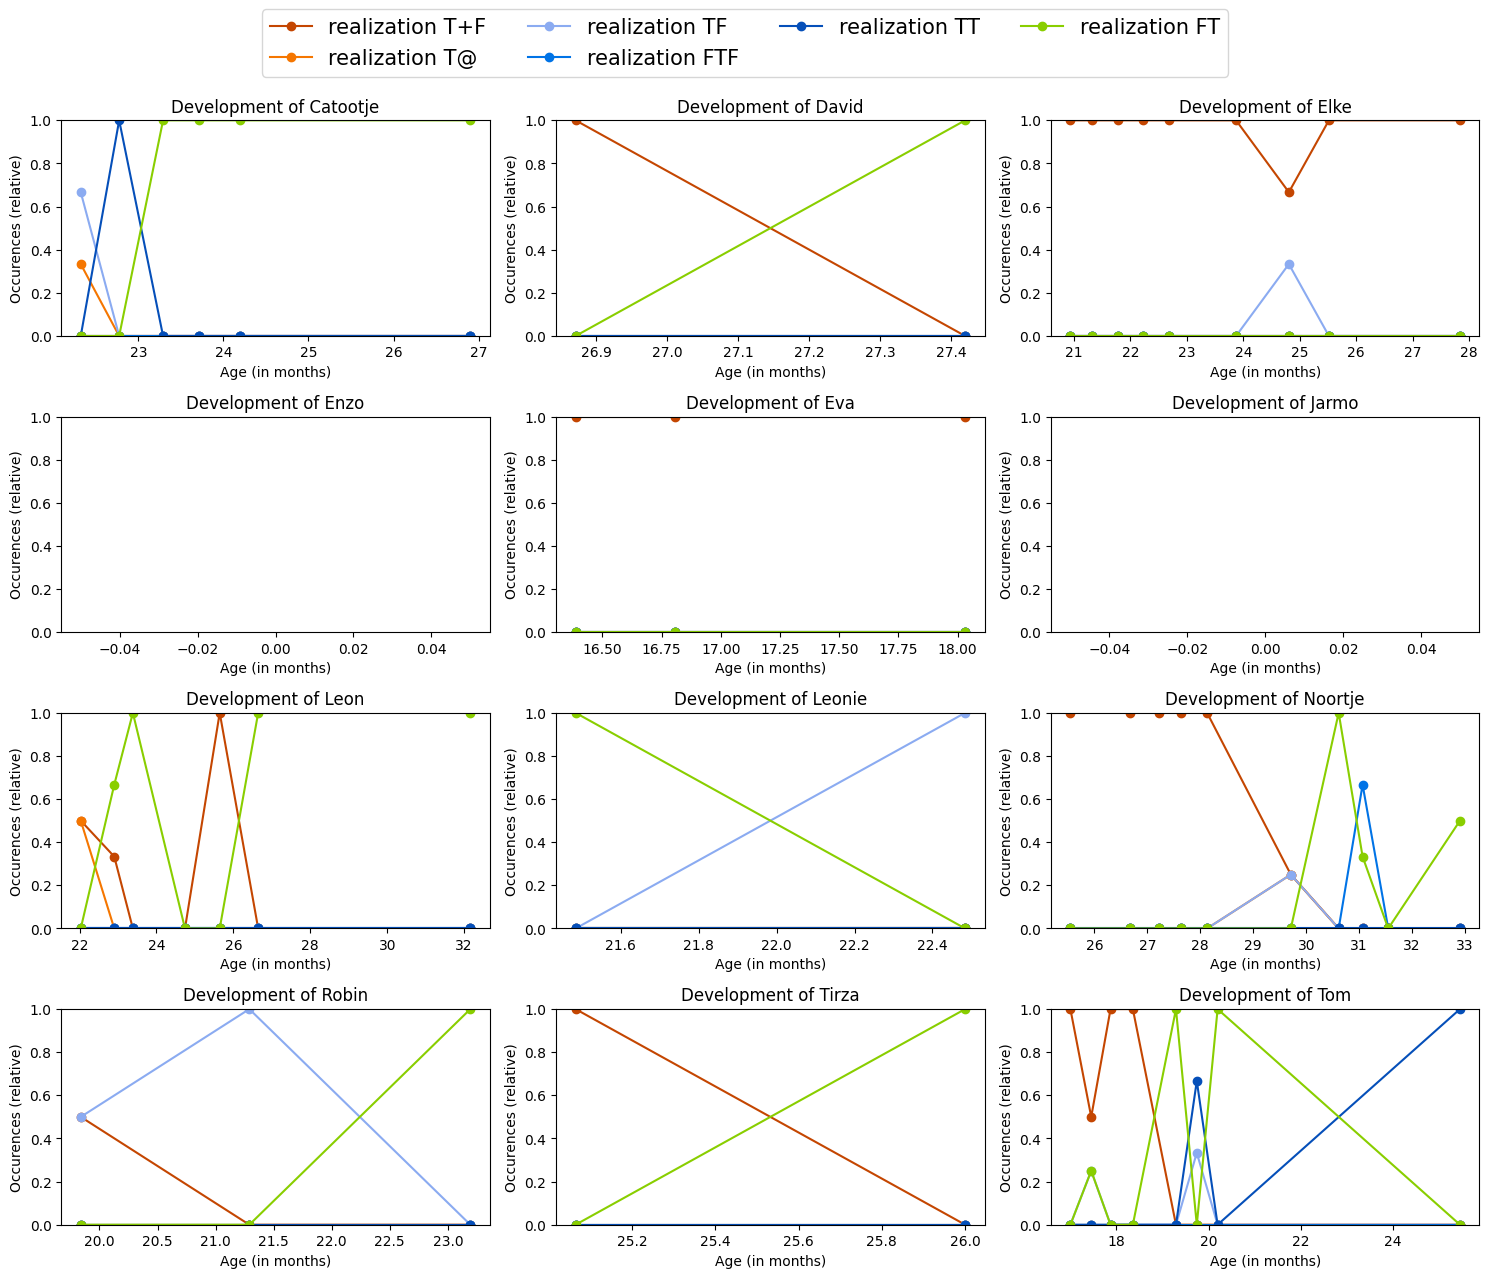

In [15]:
# Word level development for all children (obviously only shows something if the children actually produce the word)
word = 'konijn'

plot_per_word(df, word, children_names_file[corpus_name], analysis_dictionary['Fikkert'], 
              colors=analysis_dictionary['Fikkert']['color_dict_patterns'], mode='relative',
              padding_top=plot_settings[corpus_name]['padding_top']+0.11)


/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/plots.py:121: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


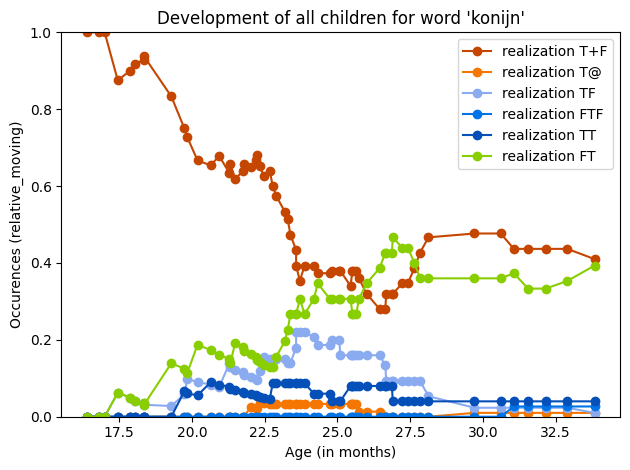

In [16]:
# Shows the development of all children together for the word (again, only works if the children produce the word)
word = 'konijn'
plot_per_word(df, word, [None], analysis_dictionary['Fikkert'], 
              colors=analysis_dictionary['Fikkert']['color_dict_patterns'], mode='relative_moving', 
              single_plot=True, append_to_title=" for word '{}'".format(word))


/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/plots.py:203: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/plots.py:203: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/plots.py:203: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/plots.py:203: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/plots.py:203: UserWarni

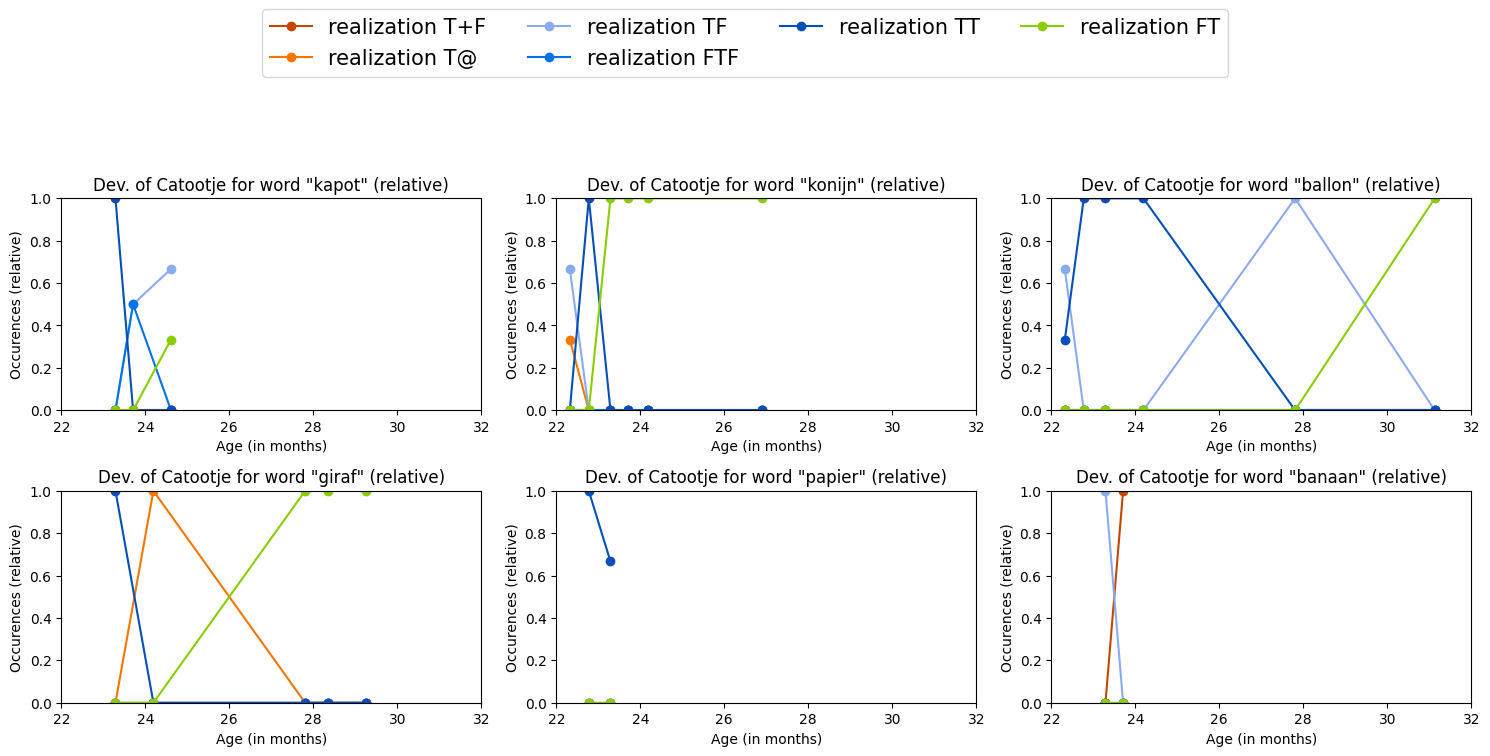

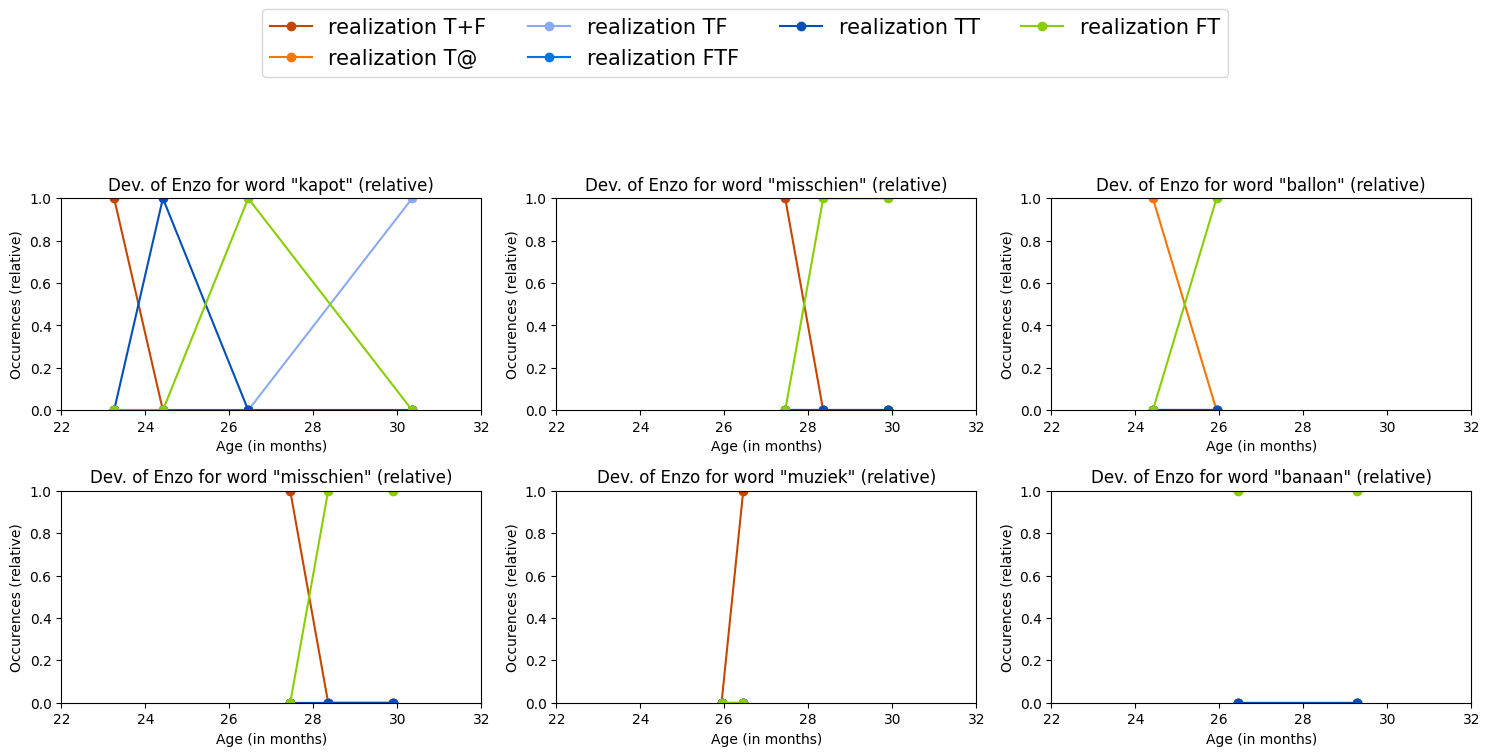

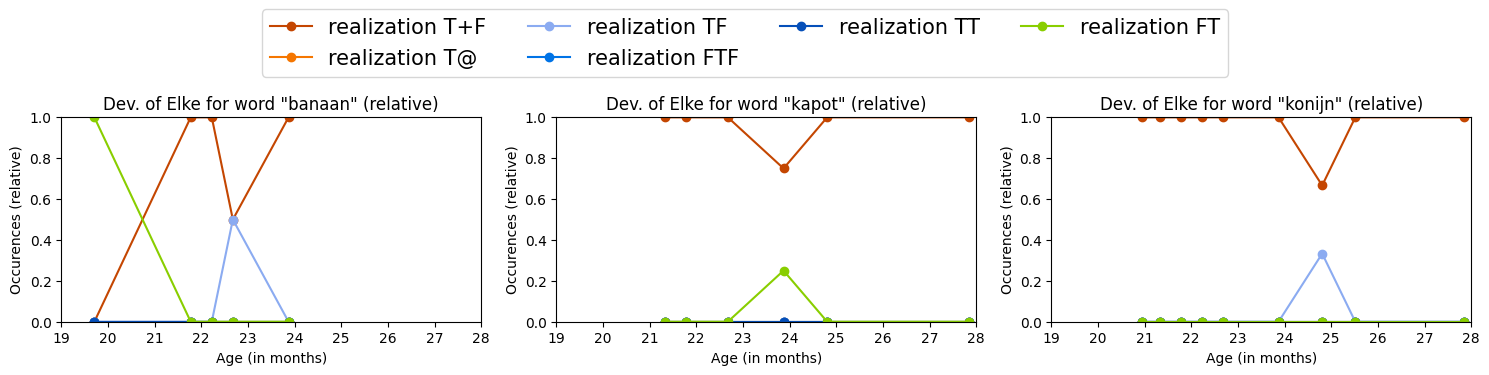

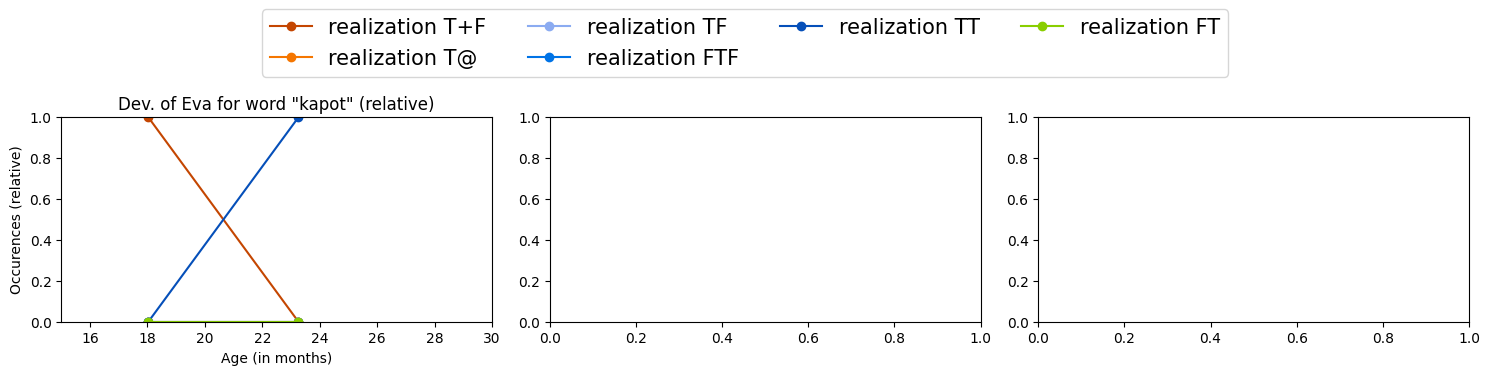

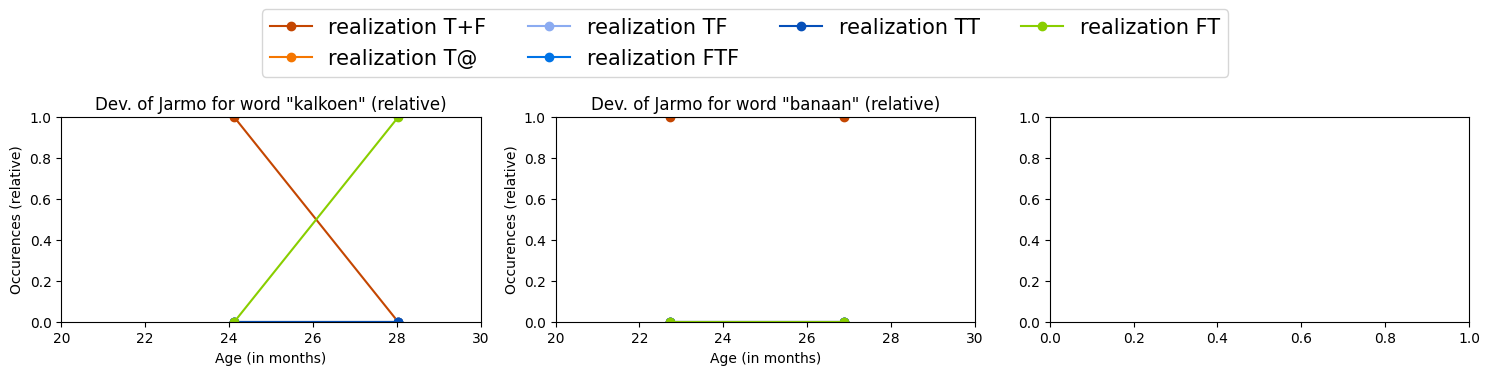

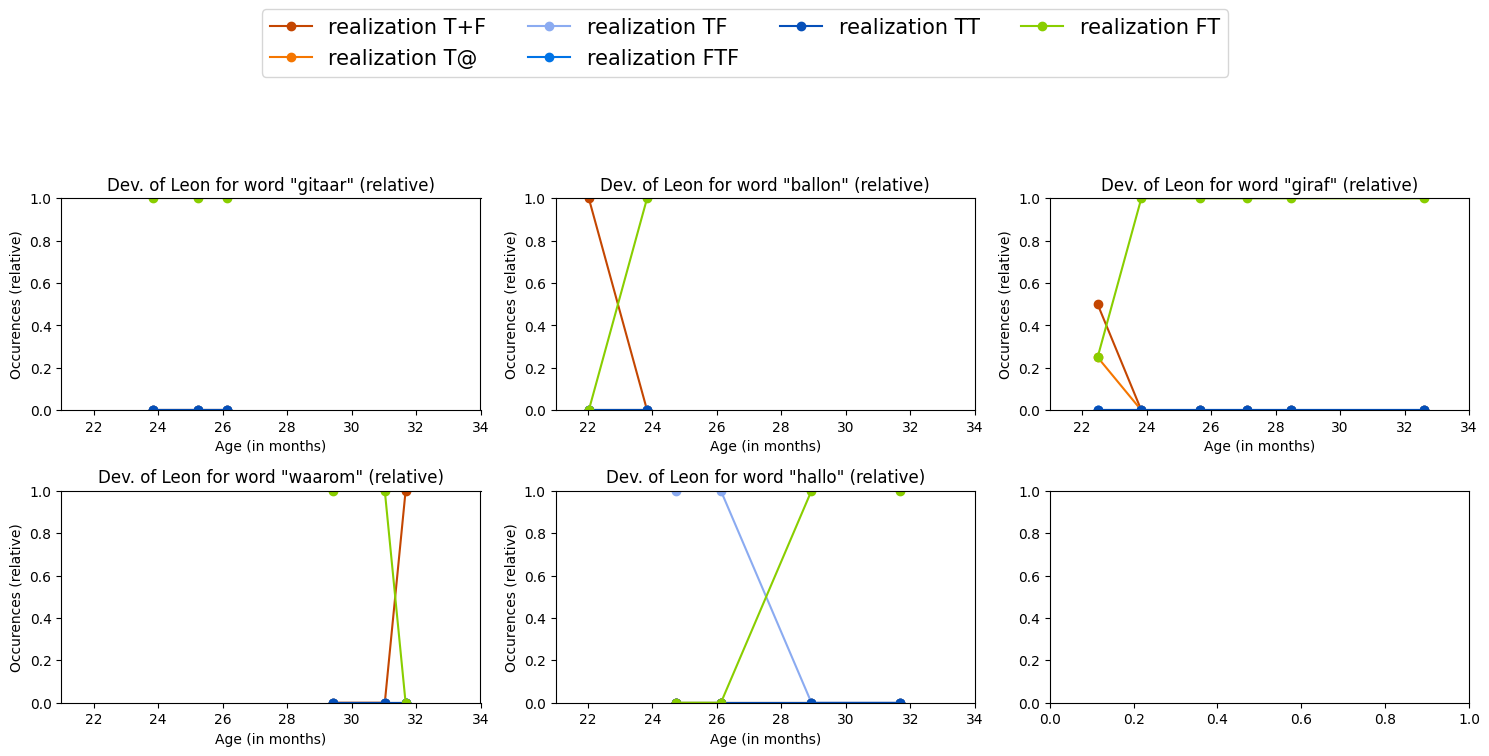

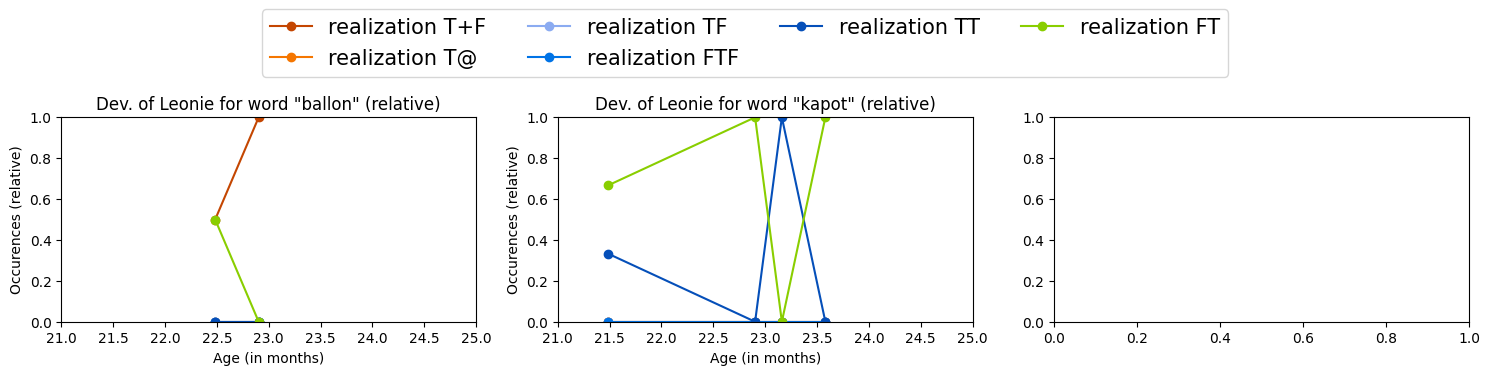

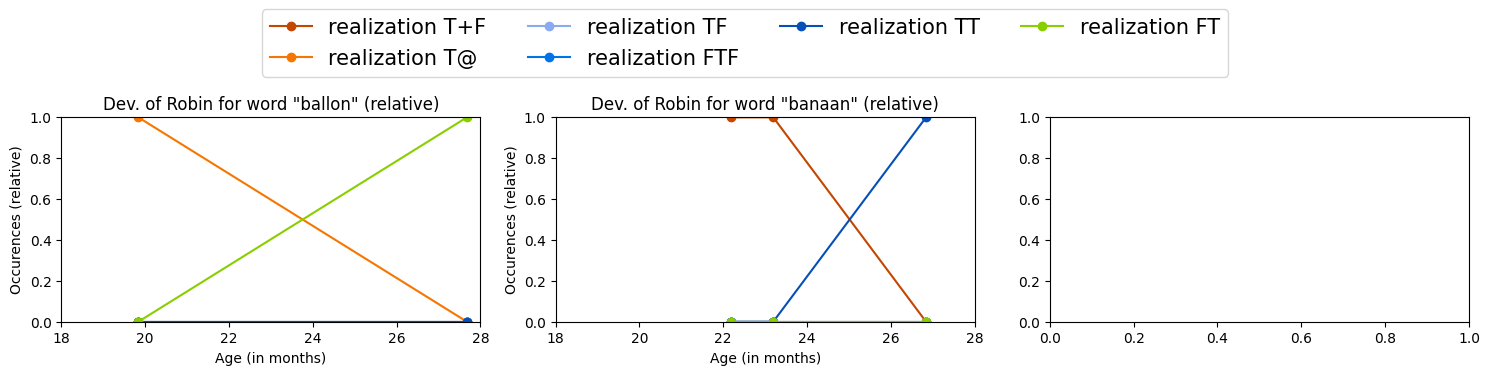

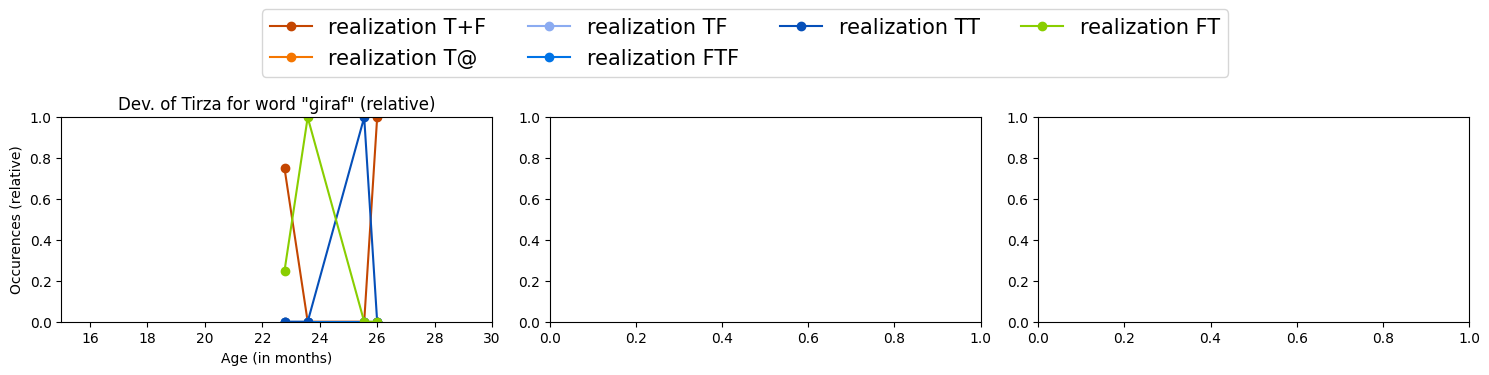

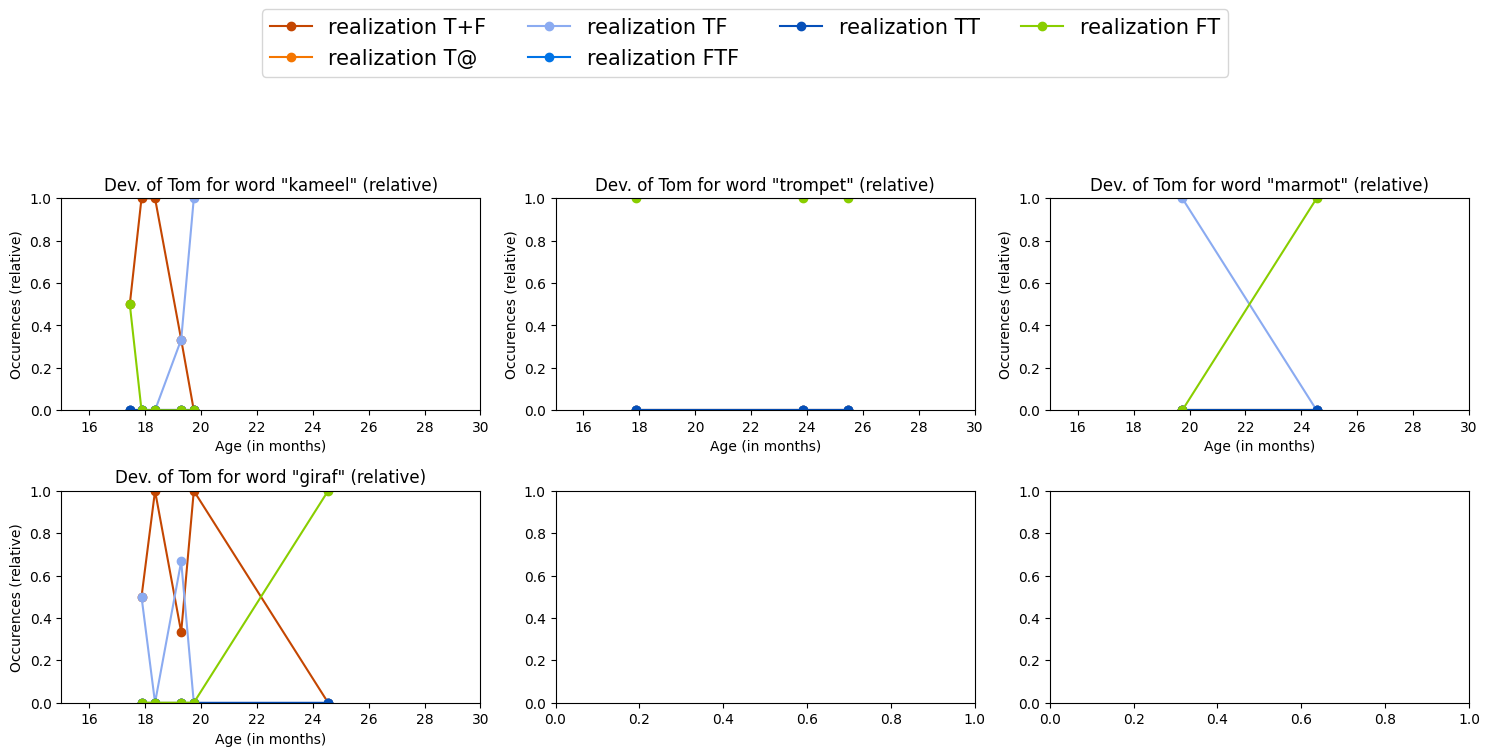

In [17]:
# Plots word development for a couple of words per child
# You need to add the words you want to see to the dictionaries above

for child_name in wordlevel_child_names[corpus_name]:
    loop_through_words_for_child(df, child_name, analysis_dictionary['Fikkert']['patterns'], 
                                 words_per_child_dict[corpus_name][child_name], 
                                 nr_per_row=plot_settings[corpus_name]['nr_per_row'], 
                                 xlim=xlim_per_child_dict[corpus_name][child_name], mode='relative', 
                                 colors=analysis_dictionary['Fikkert']['color_dict_patterns'],
                                 padding_top=plot_settings[corpus_name]['padding_top']+0.31)



/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nienke/Documents/CodeThesisTW/PhonBank-stress-analysis/ChildDevelopment.py:335: RuntimeWarning: invalid value encountered in divide
  df_count_rp = pd.DataFrame(counts[p][1][rp]/counts[p][0])
/home/nien

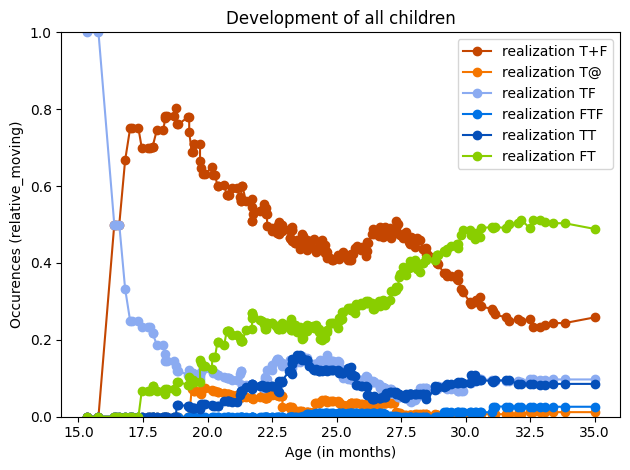

In [18]:
# Developemnt of all children together
loop_through_children(df, [None], analysis_dictionary['Fikkert'], nr_per_row = 1, mode='relative_moving', single_plot=True, colors=analysis_dictionary['Fikkert']['color_dict_patterns'], window_size=50)
